# DARWIN BOARDMAN: CAPSTONE 2
USA Vehicle Accidents: February 2016 - March 2019 <br>
Kaggle Dataset <br>
Sources: MapQuest and Bing

Explanation <br> - This dataset describes the location, time, road and environmental conditions, and severity of over 2 million accidents in the USA. The timeline of these accidents occurred between February 2016 and March 2019. <br> - The dataset was originally collected to determine if any patterns exist that could impact the outcome or quantity of accidents. <br> - Sources of the data include MapQuest and Bing. <br> - While this dataset is broad and covers the entire USA, the scope of the study will focus on the Greater Los Angeles area.

# Traffic Problems for Greater LA area
Local and state officials are receiving several complaints that traffic keeps getting held up due to vehicle accidents, very notably, at intersections with traffic lights. The U.S. Census Bureau defines the greater LA area to include Los Angeles, Orange, Riverside, San Bernardino, and Ventura counties, and is no stranger to vehicle accidents. In addition to complaints from citizens, emergency and patrol crews (i.e. police, medical, and fire departments) reported that their response time for "real" emergencies is underperforming due to crashes that occur at these intersections. 

The local government is determined to find a solution to this problem. Several experts on traffic patterns were called in to assess the situation in conjunction with government staff.

One city planner is curious if the timing of the lights have any influence on the frequency of these crashes. She read an old news story from the "Los Angeles Times" about how increasing the length of time for yellow lights has significanlty decreased crashes at intersections. Following along the same train of thought as the news report, she is curious about the timing of red lights. She wants to test the idea that if all traffic is stopped by red lights at the same time for 3 seconds, then crashes should decrease at those intersections, much like with the result from prolonging yellow lights. 

# Hypothesis
Intersections that stop all traffic with red lights for 3 seconds will experience lower rates of vehicle accidents than intersections that do not. 

# Null
There will be no statistically relevant difference in crashes that stop all traffic for 3 seconds versus intersections that do not.

# Key metric
The key metric will be the number of crashes. When running the hypothesis test, the default p-value of 0.05 will be used for threshold of the degree of significance. However, remote access to the traffic lights makes this experiment very cheap to run and has the potential to improve quality of life for the public. Therefore, it could be argued that a slightly higher threshold could still be considered good enough to move forward. 

# Secondary metrics
Secondary metrics that should be recorded for this experiment include weather, date, time, emergency vehicle response time, lattitude/longitude, vehicle information, and age of drivers involved. It's possible that location could play a significant role with the results. For example, if the decrease of accident rates is only effective in a geographically similar area, then it'll be important to figure out why that relationship exists and what makes it stand out from the other areas.

# Rollout plan
Intersections with the top 10% , bottom 10%, and middle 10% of accidents in the treatment sample will be selected to test this hypothesis. The purpose for testing these 3 subsets of the treatment is to avoid bias in the experiment. Ideally, all 3 subsets would result with a decrease in accidents; however, this method could provide deeper insight into the significance of improvement for each category. These observations will be normalized and analyzed against both historical rates of accidents for those intersections and the intersections with the top, bottom, and middle 10% of crashes within the control sample.

The tentative timeline for the experiment will be 2 months. During this time, the key and secondary metrics should be collected and weighed to ensure no external factors are influencing the study. 
Notice: The timeline is tentative. If crashes significantly increase in rate (above historical measurements or compared to control), then a possible change or cancellation should be considered for this experiment as to avoid negatively impacting the health and safety of the public.

If this experiment is successful in the treatment, then running an A/A test on the control would be recommended. This effort is to ensure the A/B testing and T-test methods were valid. Ideally, the same methods would generate similar results. It is important to consider additional tests prior to rolling out to full production, since the outcome will likely impact public safety. 

In [129]:
# Importing necessary packages

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pylab
from scipy import stats
from scipy.stats import ttest_ind
import datetime as dt
import statistics
%matplotlib inline

In [8]:
# Read csv dataset
PATH = 'C:/Users/User/Documents/Thinkful_Data Science Projects/Module 13_Experiment_AB_Testing/US_Accidents_May19.csv'
df = pd.read_csv(PATH)

# There are 49 columns in the file. This option displays all columns.
# If there is an unknown amount of columns, then using a random large number like "999" will suffice.
pd.set_option('display.max_columns', 999)

In [9]:
# preview data with sample instead of head to view wider variability in data set
df.sample(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1784627,A-1784628,Bing,NaN,2,2016-11-14 15:22:49,2016-11-14 21:22:49,27.821090,-82.679450,27.82109,-82.67961,0.010,At 34th St - Accident.,NaN,34th St N,R,Saint Petersburg,Pinellas,FL,33714,US,US/Eastern,KSPG,2016-11-14 14:53:00,70.0,NaN,76.0,29.98,10.0,NE,6.9,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1851420,A-1851421,Bing,NaN,2,2016-11-18 14:10:09,2016-11-18 20:10:09,34.015370,-118.055320,34.01939,-118.05029,0.400,At Rose Hills Rd - Accident.,NaN,San Gabriel River Fwy N,R,Whittier,Los Angeles,CA,90601,US,US/Pacific,KEMT,2016-11-18 13:45:00,78.8,NaN,7.0,30.03,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1216420,A-1216421,MapQuest,201.0,3,2018-04-23 07:34:32,2018-04-23 08:04:00,37.931858,-79.229378,NaN,NaN,0.000,Right hand shoulder blocked due to accident on...,NaN,I-81 S,R,Raphine,Rockbridge,VA,24472,US,US/Eastern,KSHD,2018-04-23 07:35:00,41.2,NaN,86.0,30.40,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2223153,A-2223154,Bing,NaN,3,2017-09-12 00:25:40,2017-09-12 06:25:40,29.542570,-98.374650,29.53706,-98.38444,0.701,At Weidner Rd/Exit 168 - Accident.,NaN,I-35 S,R,San Antonio,Bexar,TX,78233,US,US/Central,KRND,2017-09-12 00:56:00,61.9,NaN,86.0,29.96,10.0,NNW,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1344823,A-1344824,MapQuest,201.0,2,2018-02-23 09:31:27,2018-02-23 10:01:12,34.789158,-82.658112,NaN,NaN,0.000,Accident on US-123 Calhoun Memorial Hwy Northb...,471.0,Cartee Rd,L,Liberty,Pickens,SC,29657-4705,US,US/Eastern,KLQK,2018-02-23 09:35:00,62.4,NaN,100.0,30.43,7.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
# U.S. Census Bureau defines the Greater Los Angeles area to include the
# following 5 counties: Los Angeles, Orange, Riverside, San Bernardino, Ventura

# Create new dataframe that is filtered to Greater Los Angeles area
df_la = df.loc[df['County'].isin(['Los Angeles', 'Orange', 'Riverside', 'San Bernardino', 'Ventura'])]

In [11]:
df_la.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42862,A-42863,MapQuest,201.0,2,2016-06-21 10:38:14,2016-06-21 11:21:00,34.287834,-119.328407,NaN,NaN,0.0,Accident on US-101 Northbound before Exit 71 U...,NaN,El Camino Real N,R,Ventura,Ventura,CA,93001,US,US/Pacific,KOXR,2016-06-21 10:51:00,71.1,NaN,75.0,29.96,10.0,South,9.2,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
42863,A-42864,MapQuest,201.0,2,2016-06-21 10:38:47,2016-06-21 11:18:00,34.267788,-118.644249,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,Ronald Reagan Fwy W,R,Simi Valley,Ventura,CA,93063,US,US/Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
42864,A-42865,MapQuest,201.0,3,2016-06-21 10:44:51,2016-06-21 11:24:00,34.321411,-118.496750,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,I-5 N,R,Sylmar,Los Angeles,CA,91342,US,US/Pacific,KWHP,2016-06-21 09:53:00,80.6,NaN,42.0,30.02,10.0,SE,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
42865,A-42866,MapQuest,343.0,2,2016-06-21 10:44:12,2016-06-21 11:22:00,34.146858,-118.370384,NaN,NaN,0.0,Accident now on the shoulder on US-101 Southbo...,NaN,CA-170 S,R,North Hollywood,Los Angeles,CA,91602,US,US/Pacific,KBUR,2016-06-21 10:53:00,84.0,NaN,38.0,29.93,10.0,SE,8.1,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
42866,A-42867,MapQuest,201.0,2,2016-06-21 10:46:30,2016-06-21 11:27:00,34.078926,-118.289040,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,US-101 N,R,Los Angeles,Los Angeles,CA,90004,US,US/Pacific,KCQT,2016-06-21 10:47:00,82.9,NaN,47.0,29.95,10.0,Variable,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
df_la.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [13]:
df_la.shape

(285842, 49)

In [14]:
# Create new columns that parse out Year, Month, and Hour
# This will simplify future summary stats/graphs
df_la['Crash_Time'] = pd.to_datetime(df_la['Start_Time'],format='%Y-%m-%d %H:%M:%S')
df_la['Crash_Cleared'] = pd.to_datetime(df_la['End_Time'],format='%Y-%m-%d %H:%M:%S')
df_la['Weather_Time'] = pd.to_datetime(df_la['Weather_Timestamp'],format='%Y-%m-%d %H:%M:%S')


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [15]:
# Crash start date/time columns
df_la['Crash_Time_Year'] = pd.DatetimeIndex(df_la['Crash_Time']).year
df_la['Crash_Time_Month'] = pd.DatetimeIndex(df_la['Crash_Time']).month
df_la['Crash_Time_Hour'] = pd.DatetimeIndex(df_la['Crash_Time']).hour
df_la['Crash_Time_Day'] = pd.DatetimeIndex(df_la['Crash_Time']).day

# Crash cleared date/time columns
df_la['Crash_Cleared_Year'] = pd.DatetimeIndex(df_la['Crash_Cleared']).year
df_la['Crash_Cleared_Month'] = pd.DatetimeIndex(df_la['Crash_Cleared']).month
df_la['Crash_Cleared_Hour'] = pd.DatetimeIndex(df_la['Crash_Cleared']).hour

# Calculate total length of time for each crash 
df_la['Total_Crash_Time'] = df_la['Crash_Cleared'] - df_la['Crash_Time'] 
df_la['Sum_Crash_Time_Minutes'] = (df_la['Total_Crash_Time'].dt.seconds.div(60).astype(int) + df_la['Total_Crash_Time'].dt.days.multiply(1440).astype(int))
df_la['Sum_Crash_Time_Minutes'].round(3)

# Create a new column that records "1" for each crash so they can be added up later for frequency puposes.
df_la['Crash_Event'] = 1

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [16]:
df_la.sort_values(['Start_Lat', 'Crash_Time'], inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_la = df_la.drop_duplicates(subset=('Start_Lat', 'Crash_Time'), keep='first')

In [18]:
df_la.shape

(284555, 62)

In [21]:
df_la.describe(include = 'all')

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Crash_Time,Crash_Cleared,Weather_Time,Crash_Time_Year,Crash_Time_Month,Crash_Time_Hour,Crash_Time_Day,Crash_Cleared_Year,Crash_Cleared_Month,Crash_Cleared_Hour,Total_Crash_Time,Sum_Crash_Time_Minutes,Crash_Event
count,284555,284555,217359.000000,284555.000000,284555,284555,284555.000000,284555.000000,67196.000000,67196.000000,284555.000000,284555,53531.000000,284555,284555,284551,284555,284555,284555,284555,284555,273212,271901,269915.000000,3017.000000,269694.000000,271136.000000,270552.000000,271896,194390.000000,13198.000000,271182,284555,284555,284555,284555,284555,284555,284555,284555,284555,284555,284555,284555,284555,284551,284551,284551,284551,284555,284555,271901,284555.000000,284555.000000,284555.000000,284555.000000,284555.000000,284555.000000,284555.000000,284555,284555.000000,284555.0
unique,284555,3,NaN,NaN,273985,272224,NaN,NaN,NaN,NaN,NaN,147237,NaN,10763,2,398,5,8,17068,1,3,64,98482,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,38,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,273985,272224,98482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A-79575,MapQuest,NaN,NaN,2016-03-29 09:18:13,2016-04-26 22:30:00,NaN,NaN,NaN,NaN,NaN,At I-605 - Accident.,NaN,I-405 N,R,Los Angeles,Los Angeles,CA,91706,US,US/Pacific,KCQT,2018-06-30 22:53:00,NaN,NaN,NaN,NaN,NaN,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-03-29 09:18:13,2016-04-26 22:30:00,2018-06-30 22:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,212619,NaN,NaN,14,15,NaN,NaN,NaN,NaN,NaN,445,NaN,11350,257102,49389,171197,256586,3518,284555,256586,36654,72,NaN,NaN,NaN,NaN,NaN,74875,NaN,NaN,152275,282806,284545,270621,284521,255303,284395,281210,284547,277547,283107,284540,255926,284555,195050,206456,219655,230595,14,15,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-22 19:14:41,2016-03-22 22:23:42,2016-03-22 18:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-31 21:34:53,2019-03-31 22:34:34,2019-03-31 21:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,209.648922,2.423289,NaN,NaN,33.564761,-114.377977,33.571757,-114.379302,0.162187,NaN,8683.022660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.382915,35.763275,58.732070,29.978965,9.219802,NaN,7.848521,0.045249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.166175,6.532691,12.416654,15.728805,2017.166239,6.533461,13.140029,0 days 01:43:52.848679,103.464023,1.0
std,NaN,NaN,20.495353,0.518521,NaN,NaN,1.710533,11.075281,1.700521,11.078620,0.839711,NaN,10024.131551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.847721,8.827078,23.534778,0.263456,2.050836,NaN,6.652627,0.089623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928414,3.394496,5.601646,8.785618,0.928407,3.394423,6.171483,1 days 01:33:41.625598,1533.709535,0.0
min,NaN,NaN,200.000000,0.000000,NaN,NaN,28.346912,-119.477493,28.323470,-120.396010,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.100000,-23.800000,4.000000,0.300000,0.000000,NaN,1.200000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Total crashes: 284555
Total months:37
Average crashes per month:7691.0


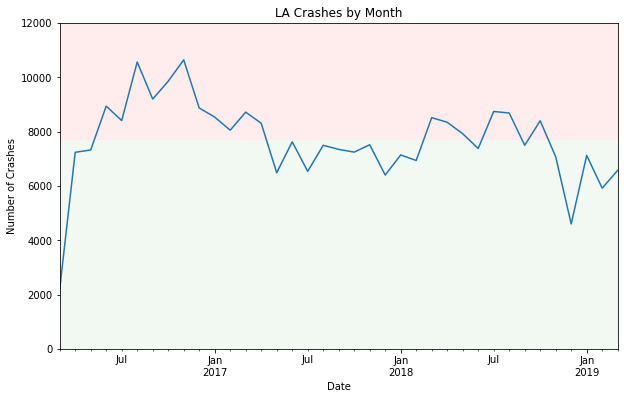

In [23]:
# Defined variables to plot
crashes = df_la['Crash_Event']
crashes.index = df_la['Crash_Time']

# Configured plot size to clearly observe trends.
plt.figure(figsize=(10, 6))
crashes.resample('m').count().plot()

# Find mean of all crashes to guide cutoff of background color
# First, get totals of all crashes and months
total_crashes = df_la.Crash_Event.count()
total_months = df_la.groupby(['Crash_Time_Year', 'Crash_Time_Month'])['Crash_Time_Month'].unique().count()
print('Total crashes: ' + str(total_crashes))

# Second, simply divide crashes by months to get an average of crash/month
print('Total months:' + str(total_months))
avg_crash_per_month = total_crashes / total_months
print('Average crashes per month:' + str(round(avg_crash_per_month)))

# Added background colors to emphasize relative frequencies of crashes over time.
pylab.axhspan(0, 7691, facecolor='g', alpha=0.05) # green span
pylab.axhspan(7691, 12000, facecolor='r', alpha=0.075) # red span

# Limited plot scale to clean up the look.
pylab.ylim(0, 12000)

# Added labels
pylab.xlabel('Date')
pylab.ylabel('Number of Crashes')
pylab.title('LA Crashes by Month')

pylab.show()

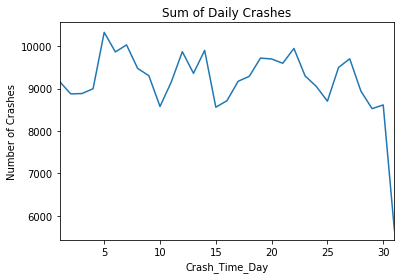

In [24]:
daily_crashes = df_la.groupby('Crash_Time_Day')['Crash_Event'].count()

plt.xlabel('Days of the Month')
plt.ylabel('Number of Crashes')
plt.title('Sum of Daily Crashes')
daily_crashes.plot();

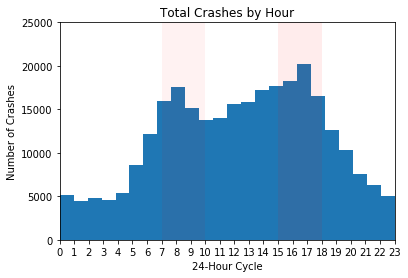

17 is the most common hour for crashes.
9179 is the average amount of crashes per day throughout this dataset.


In [25]:
# Make histogram
df_la.hist(column='Crash_Time_Hour', bins = 24)

# Change background color based on y axis value.
pylab.axvspan(7, 10, facecolor='r', alpha=0.05) # green span
pylab.axvspan(15, 18, facecolor='r', alpha=0.075) # red span

# Limit axis values for cleaner presentation
pylab.xlim(0, 23)
pylab.ylim(0, 25000)

# Edit axis labels
pylab.xticks(range(0, 24))
pylab.xlabel('24-Hour Cycle')
pylab.ylabel('Number of Crashes')
pylab.title('Total Crashes by Hour')

# Take off grid to make the plot cleaner
pylab.grid(b=None) 

pylab.show()

# print general summary stats
print(str(statistics.mode(df_la['Crash_Time_Hour'])) + 
      ' is the most common hour for crashes.')
print(str(round(df_la.groupby('Crash_Time_Day')['Crash_Event'].count().mean())) + 
     ' is the average amount of crashes per day throughout this dataset.')

In [26]:
df_la['day_of_week'] = df_la['Crash_Time'].dt.day_name()

In [27]:
print(df_la['day_of_week'].unique())

['Tuesday' 'Friday' 'Monday' 'Thursday' 'Wednesday' 'Sunday' 'Saturday']


In [29]:
df_la['weekday_id'] = df_la['Crash_Time'].dt.dayofweek

In [33]:
df_la['Weekday_id_name'] = df_la['weekday_id'].map(str) + '-' + df_la['day_of_week']

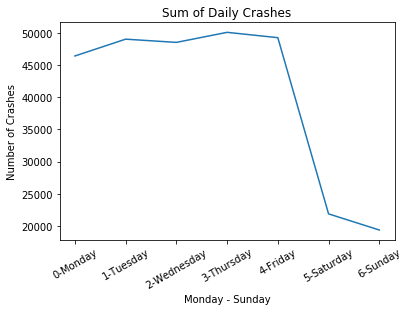

In [43]:
plt.plot(df_la.groupby('Weekday_id_name')['Crash_Event'].count())


plt.xlabel('Monday - Sunday')
plt.ylabel('Number of Crashes')
plt.title('Sum of Daily Crashes')
plt.xticks(rotation=30)

plt.show()

In [54]:
print(df_la.Weekday_id_name.value_counts())

3-Thursday     50067
4-Friday       49238
1-Tuesday      49008
2-Wednesday    48507
0-Monday       46401
5-Saturday     21919
6-Sunday       19415
Name: Weekday_id_name, dtype: int64


In [178]:

# Total number of crashes during morning commute
#df_la['morning_commute'] = (df_la[df_la['Crash_Time_Hour'].isin([7, 8, 9, 10])] = True)

df_la['morning_commute'] = np.where(df_la['Crash_Time_Hour'].isin([7, 8, 9, 10]), 1, 0).astype(np.int64)
df_la['evening_commute'] = np.where(df_la['Crash_Time_Hour'].isin([15, 16, 17, 18]), 1, 0).astype(np.int64)
df_la['all_rush_hr_crashes'] = df_la['morning_commute'] + df_la['evening_commute']

sum_morn_commute_crashes = df_la['morning_commute'].sum()
sum_eve_commute_crashes = df_la['evening_commute'].sum()
total_rush_hr_crashes = sum_morn_commute_crashes + sum_eve_commute_crashes

print('Sum morning rush hour crashes: ' + str(sum_morn_commute_crashes))
print('Sum evening rush hour crashes: ' + str(sum_eve_commute_crashes))
print('Total rush hour crashes: ' + str(total_rush_hr_crashes))

# Total number of crashes during evening commute


# Total number of crashes during all rush hours



# Percent of crashes during morning and evening commutes
perc_crash_morn = (sum_morn_commute_crashes / total_crashes) * 100
perc_crash_eve = (sum_eve_commute_crashes / total_crashes) * 100
perc_rush_hr_crash = (total_rush_hr_crashes / total_crashes) * 100

print(str(round(perc_crash_morn, 2)) + '% of crashes occur during the morning rush hour.')
print(str(round(perc_crash_eve, 2)) + '% of crashes occur during the evening rush hour.')
print(str(round(perc_rush_hr_crash, 2)) + '% of crashes occur during rush hours.')


Sum morning rush hour crashes: 62423
Sum evening rush hour crashes: 72618
Total rush hour crashes: 135041
21.94% of crashes occur during the morning rush hour.
25.52% of crashes occur during the evening rush hour.
47.46% of crashes occur during rush hours.


In [179]:
print('treatment sample size:', len(df_la[df_la.morning_commute == 1]))
print('control sample size:', len(df_la[df_la.evening_commute == 1]))
print('test proportion:', df_la.morning_commute.mean())


treatment sample size: 62423
control sample size: 72618
test proportion: 0.21937059619405738


In [208]:
control_mean = np.mean(df_la['morning_commute'])
control_var = df_la['morning_commute'].var()
control_std = np.std(df_la['morning_commute'], ddof = 1)
treatment_mean = np.mean(df_la['evening_commute'])
treatment_var = df_la['evening_commute'].var()
treatment_std = np.std(df_la['evening_commute'], ddof = 1)

print('treatment mean:' + str(treatment_mean))
print('treatment variance:' + str(treatment_var))
print('treatment standard deviation:' + str(treatment_std))
print('control mean:' + str(control_mean))
print('control variance:' + str(control_var))
print('control standard deviation:' + str(control_std))

# Are the test and control groups significantly different?
stats.ttest_ind(df_la_2[df_la_2.morning_commute == 1].all_rush_hr_crashes,
                df_la_2[df_la_2.evening_commute == 1].all_rush_hr_crashes)


treatment mean:0.2551984677830296
treatment variance:0.19007287778907603
treatment standard deviation:0.4359734828966964
control mean:0.21937059619405738
control variance:0.17124773952766445
control standard deviation:0.41382090271959976


Ttest_indResult(statistic=nan, pvalue=nan)

In [197]:
diff = control_mean - treatment_mean
print(diff)

-0.03582787158897224


In [206]:
size = np.array([len(df_la.morning_commute) ==1, len(df_la.evening_commute) == 1])
print(size)
sd = np.array([len(df_la.morning_commute).std(), len(df_la.evening_commute).std()])
#print(sd)

#diff_se = (sum(sd ** 2 / size)) ** 0.5
#print(diff_se)
#print(diff/diff_se)


[False False]


AttributeError: 'int' object has no attribute 'std'

In [199]:
diff_se_control = (control_std ** 2)/sum_morn_commute_crashes
print(diff_se_control)
diff_se_treatment = (treatment_std ** 2)/sum_eve_commute_crashes
print(diff_se_treatment)
diff_se_sum = (diff_se_control + diff_se_treatment) ** 0.5
print(diff_se_sum)
print(diff/diff_se_sum)

2.743343631797005e-06
2.617434765334711e-06
0.0023153354826313433
-15.474159946900834


In [174]:
# Are the test and control groups significantly different?
print(ttest_ind(df_la.evening_commute, df_la.morning_commute, equal_var = False))

Ttest_indResult(statistic=31.79492081928377, pvalue=1.1939028944381056e-221)


In [175]:
df_la.evening_commute.value_counts()


0    211937
1     72618
Name: evening_commute, dtype: int64

In [215]:
#LETS TRY THIS A DIFFERENT WAY!!!
df_la_2 = df_la.groupby(df_la['Crash_Time_Hour']).sum()


In [216]:
control_mean = np.mean(df_la_2['morning_commute'])
control_var = df_la_2['morning_commute'].var()
control_std = np.std(df_la_2['morning_commute'], ddof = 1)
treatment_mean = np.mean(df_la_2['evening_commute'])
treatment_var = df_la_2['evening_commute'].var()
treatment_std = np.std(df_la_2['evening_commute'], ddof = 1)

print('treatment mean:' + str(treatment_mean))
print('treatment variance:' + str(treatment_var))
print('treatment standard deviation:' + str(treatment_std))
print('control mean:' + str(control_mean))
print('control variance:' + str(control_var))
print('control standard deviation:' + str(control_std))

treatment mean:3025.75
treatment variance:48084248.717391305
treatment standard deviation:6934.280692140412
control mean:2600.9583333333335
control variance:35627693.259058
control standard deviation:5968.893805309154


In [217]:
# Are the test and control groups significantly different?
print(ttest_ind(df_la_2.evening_commute, df_la_2.morning_commute, equal_var = False))

Ttest_indResult(statistic=0.2274510262994433, pvalue=0.8211032116026482)


In [226]:
diff = treatment_mean - control_mean
print(diff)

424.7916666666665


In [238]:
size = np.array([len(df_la_2.morning_commute) > 0, len(df_la_2.evening_commute)> 0])
print(size)
sd = np.array([df_la_2.morning_commute.std(), df_la_2.evening_commute.std()])
print(sd)

diff_se = (sum(sd ** 2 / size)) ** 0.5
print(diff_se)
print(diff/diff_se)

[ True  True]
[5968.89380531 6934.28069214]
9149.423040632088
0.046428246325499425


In [236]:
size_2 = np.where((df_la_2.morning_commute > 0), (df_la_2.evening_commute > 0))
print(size_2)

ValueError: either both or neither of x and y should be given